<a href="https://colab.research.google.com/github/harmonicfunc/LogicalRhythm2k23/blob/main/LR_ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'anyas-gojo-revival:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F62904%2F6870515%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240405%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240405T190959Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e931ab63f91466d48f1fae269342e1d8fe7af1ca46d038ce7162534a9703945bea5f2c08bb5f2fd5dd963faa4bf067fc06cb4e00496ee9db7a53323a187435a97a39141796e2970ecceb3209b0bd7b79c55f396f5f91f92990926a9f13bd2bff8363da8b3dde74d175e653b7d652c365af15dc3d6af2de05c4f39a0c53e23d20355ebbbe16d91fa891ce3d2f98f5cc936396bf9f705f5e198e568065689d4e3b945159b9fcd9ee2ef880fba81ce35c52637aeed3197a863a6cfcdbb504811f980495b0f4e7f846adda8121eb52ff88ae467197b6fc8882e83751d87a1b7867cb5b80d1444efe596218e397d60a2c9ee6428209214bcd230aed40dd4127d4e24'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65234 bytes downloaded
Downloaded and uncompressed: anyas-gojo-revival
Data source import complete.


In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival/sample_submission.csv
/kaggle/input/anyas-gojo-revival/sheet2.csv
/kaggle/input/anyas-gojo-revival/sheet1.csv


In [7]:
import csv # Provides functionality to work with Comma-Separated Values (CSV) files
import time # Enables timer to track computational performance
import warnings # Used to control warning messages displayed

# Third-Party General Libraries
import matplotlib.pyplot as plt # Used for creating static, animated, and interactive visualizations
import seaborn as sns # Data visualization library based on matplotlib for creating informative and attractive statistical graphics
import scipy.stats as stats# Provides a large number of probability distributions and statistical functions
import sympy as sy # Library for symbolic mathematics
import xgboost as xgb # Implementation of gradient boosted decision trees designed for speed and performance

# Sklearn utilities and model selection
from sklearn.base import BaseEstimator, TransformerMixin # Base classes for custom transformers
from sklearn.model_selection import (GridSearchCV, StratifiedShuffleSplit, train_test_split, KFold, cross_val_score) # Utilities for model selection and evaluation
from sklearn.pipeline import Pipeline # Used for assembling several steps that can be cross-validated together
from sklearn.feature_selection import RFECV # Recursive Feature Elimination with Cross-Validation
from sklearn.impute import SimpleImputer # Imputation transformer for completing missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Preprocessing and Normalization

# Sklearn Regression Algorithms
from sklearn.ensemble import RandomForestRegressor, IsolationForest, GradientBoostingRegressor, StackingRegressor # Ensemble methods for regression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, BayesianRidge, Ridge # Linear models for regression
from sklearn.neighbors import KNeighborsRegressor # Implementation of K-nearest neighbors regressor
from sklearn.metrics import mean_squared_error # Metric to measure model performance
from sklearn.svm import SVR # Epsilon-Support Vector Regression

# Other Regression Algorithms
from catboost import CatBoostRegressor # High-performance open source library for gradient boosting on decision trees
from lightgbm import LGBMRegressor # LightGBM is a gradient boosting framework that uses tree-based learning algorithms
from xgboost import XGBRegressor  # XGBoost is an optimized distributed gradient boosting library designed to be efficient, flexible, and portable

# SciPy functions
from scipy.stats import skew, kurtosis, norm, shapiro, johnsonsu # Functions to compute skewness, kurtosis, norm, shapiro and Johnson SU distribution
from scipy.stats import probplot

# Configuration
warnings.filterwarnings('ignore') # Suppress warning messages for cleaner output

In [8]:
train_df = pd.read_csv("/kaggle/input/anyas-gojo-revival/sheet1.csv")
test_df = pd.read_csv("/kaggle/input/anyas-gojo-revival/sheet2.csv")
combined_data = pd.concat([train_df, test_df], axis=0)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      69 non-null     int64  
 1   a       69 non-null     object 
 2   b       69 non-null     float64
 3   c       69 non-null     float64
 4   d       69 non-null     int64  
 5   e       69 non-null     float64
 6   f       69 non-null     int64  
 7   g       69 non-null     float64
 8   h       69 non-null     int64  
 9   i       69 non-null     int64  
 10  j       69 non-null     float64
 11  k       69 non-null     float64
 12  l       69 non-null     int64  
 13  m       69 non-null     int64  
 14  n       69 non-null     int64  
 15  o       69 non-null     int64  
 16  p       69 non-null     float64
 17  q       61 non-null     float64
 18  r       61 non-null     float64
 19  s       69 non-null     int64  
 20  t       69 non-null     int64  
 21  u       69 non-null     float64
 22  v   

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1064 non-null   int64  
 1   a       1064 non-null   object 
 2   b       1064 non-null   float64
 3   c       1064 non-null   float64
 4   d       1064 non-null   int64  
 5   e       1064 non-null   float64
 6   f       1064 non-null   int64  
 7   g       1064 non-null   float64
 8   h       1064 non-null   int64  
 9   i       1064 non-null   int64  
 10  j       1027 non-null   float64
 11  k       1064 non-null   float64
 12  l       1064 non-null   int64  
 13  m       1064 non-null   int64  
 14  n       1064 non-null   int64  
 15  o       1064 non-null   int64  
 16  p       1064 non-null   float64
 17  q       930 non-null    float64
 18  r       930 non-null    float64
 19  s       1064 non-null   int64  
 20  t       1064 non-null   int64  
 21  u       1064 non-null   float64
 22  

In [11]:
train_df.isnull().sum()

id        0
a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
o         0
p         0
q         8
r         8
s         0
t         0
u         0
v         0
target    0
dtype: int64

In [12]:
test_df.isnull().sum()

id      0
a       0
b       0
c       0
d       0
e       0
f       0
g       0
h       0
i       0
j      37
k       0
l       0
m       0
n       0
o       0
p       0
q     134
r     134
s       0
t       0
u       0
v       0
dtype: int64

In [13]:
train_df['q']=train_df['q'].fillna(train_df['q'].mode()[0])
train_df['r']=train_df['r'].fillna(train_df['r'].mode()[0])
train_df.isnull().sum()

id        0
a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
o         0
p         0
q         0
r         0
s         0
t         0
u         0
v         0
target    0
dtype: int64

In [14]:
test_df['q']=test_df['q'].fillna(test_df['q'].mode()[0])
test_df['r']=test_df['r'].fillna(test_df['r'].mode()[0])
#test_df['j']=test_df['j'].fillna(test_df['j'].mean())
test_df.isnull().sum()

id     0
a      0
b      0
c      0
d      0
e      0
f      0
g      0
h      0
i      0
j     37
k      0
l      0
m      0
n      0
o      0
p      0
q      0
r      0
s      0
t      0
u      0
v      0
dtype: int64

In [15]:
train_df.drop(['a','v'],axis=1,inplace=True)
test_df.drop(['a','v'],axis=1,inplace=True)

In [16]:
X_train=train_df.drop(['target'],axis=1)
Y_train=train_df['target']
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
}
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,cv=5,n_iter=50,
                            scoring='neg_mean_absolute_error',n_jobs=4,verbose=5,return_train_score=True,random_state=42)
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [17]:
X_train=train_df.drop(['target'],axis=1)
Y_train=train_df['target']
regressor=xgboost.XGBRegressor(**random_cv.best_params_)
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(test_df)
y_pred

array([-0.33267802,  6.091331  , -0.33786628, ..., 35.055     ,
       32.84723   , 34.889534  ], dtype=float32)

In [18]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('/kaggle/input/anyas-gojo-revival/sample_submission.csv')
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','target']
datasets.to_csv('sample_submission.csv',index=False)
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='sample_submission.csv')

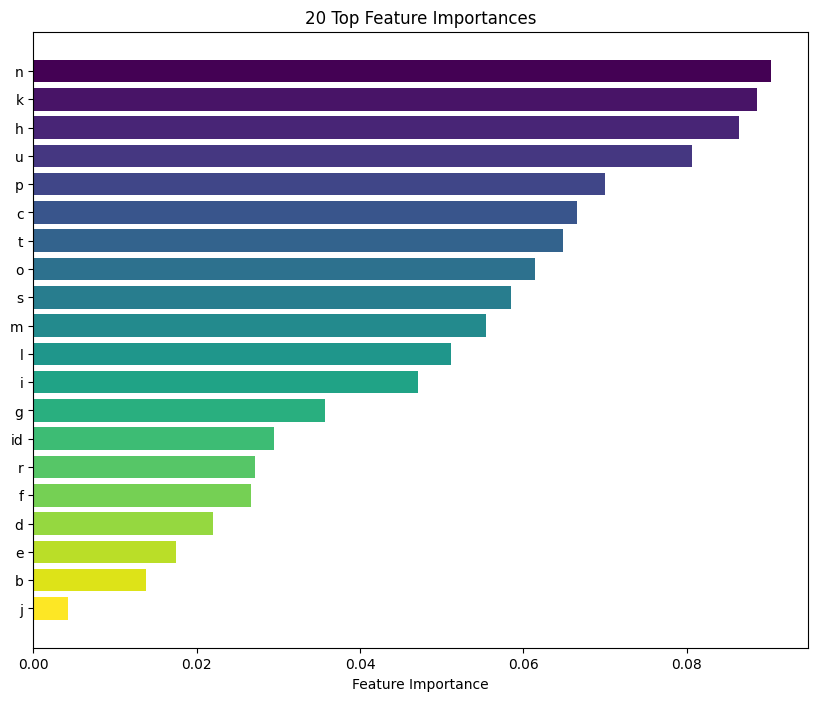


10 Worst Feature Importances:
i: 0.04706010700840427
g: 0.03567110410867724
id: 0.029486799463632415
r: 0.027185178011561353
f: 0.026637543366717864
d: 0.02204761368617273
e: 0.01752506610138542
b: 0.013771882734640205
j: 0.0042473026604661155
q: 0.002646817131439971


In [19]:
X = train_df.drop(columns=['target'])  # Drop the target variable
y = train_df['target']


# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Get the feature names (column names)
feature_names = X.columns

# Sort feature importances and feature names by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
# Plot the top N feature importances
top_n = 20  # You can change this to the number of top features you want to plot
colors = plt.cm.viridis(np.linspace(0, 1, top_n))
plt.figure(figsize=(10, 8))
plt.barh(range(top_n), sorted_importances[:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Feature Importance')
plt.title('20 Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


# Assuming you have already trained the RandomForestRegressor model and have the feature importances
# Get the 10 worst feature importances
num_worst = 10
worst_feature_importances = sorted_importances[-num_worst:]
# Get the corresponding feature names for the worst importances
worst_feature_names = sorted_feature_names[-num_worst:]
# Print the 10 worst feature importances
print("\n10 Worst Feature Importances:")
for feature, importance in zip(worst_feature_names, worst_feature_importances):
    print(f"{feature}: {importance}")

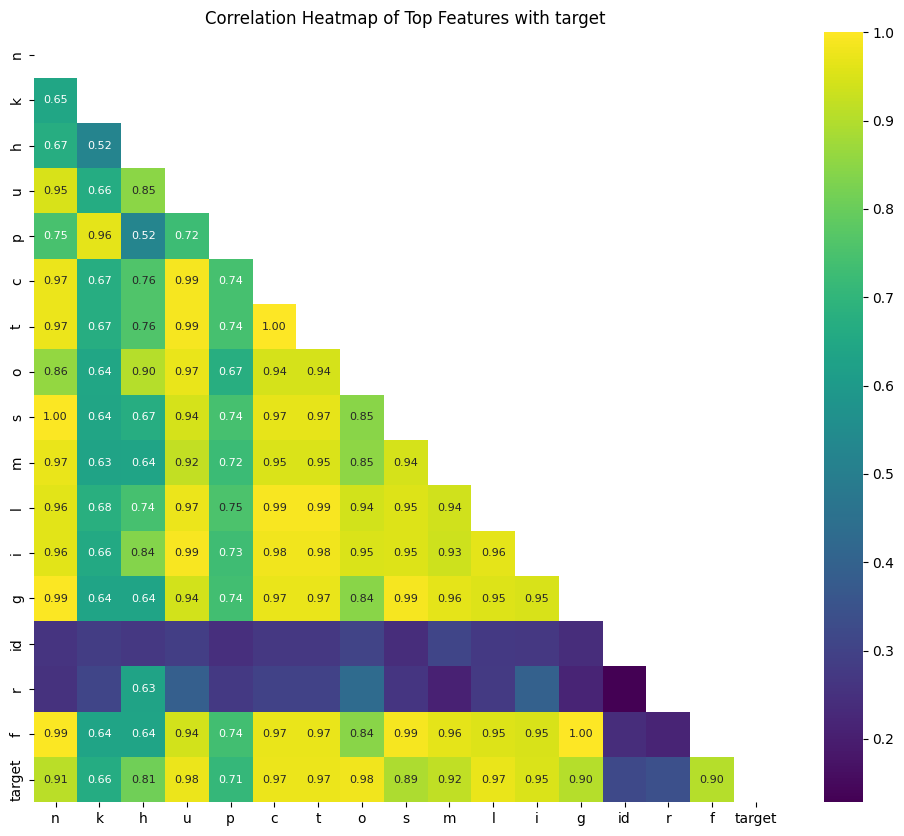

In [20]:
top_n = 16  # Number of top features you want to include
selected_features = list(sorted_feature_names[:top_n]) + ['target']

# Select only the important features and SalePrice from the original DataFrame
selected_data = train_df[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set a threshold for annotating the heatmap values
threshold = 0.5
# Generate annotations: Format values if above threshold, else leave blank
annotations = correlation_matrix.applymap(lambda x: f"{x:.2f}" if abs(x) > threshold else "")
annot_kws = {'fontsize': 8}


# Draw the lower triangle heatmap
sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap="viridis", mask=mask, annot_kws=annot_kws)
#sns.heatmap(correlation_matrix, annot=annotations, fmt='', cmap="RdBu_r", mask=mask, annot_kws=annot_kws)



plt.title('Correlation Heatmap of Top Features with target')
plt.show()

In [21]:
test_normality = lambda x: stats.shapiro(x.dropna())[1] > 0.01
normal = pd.DataFrame(train_df)
is_normal = normal.apply(test_normality)

# Collect features that are normally distributed
normal_features = [feature for feature, normality in is_normal.items() if normality]

# Print concise results
if not normal_features:
    print("None of the features is normally distributed.")
else:
    print("The following features are normally distributed:")
    for feature in normal_features:
        print(f"- {feature}")

The following features are normally distributed:
- id
- k
- p


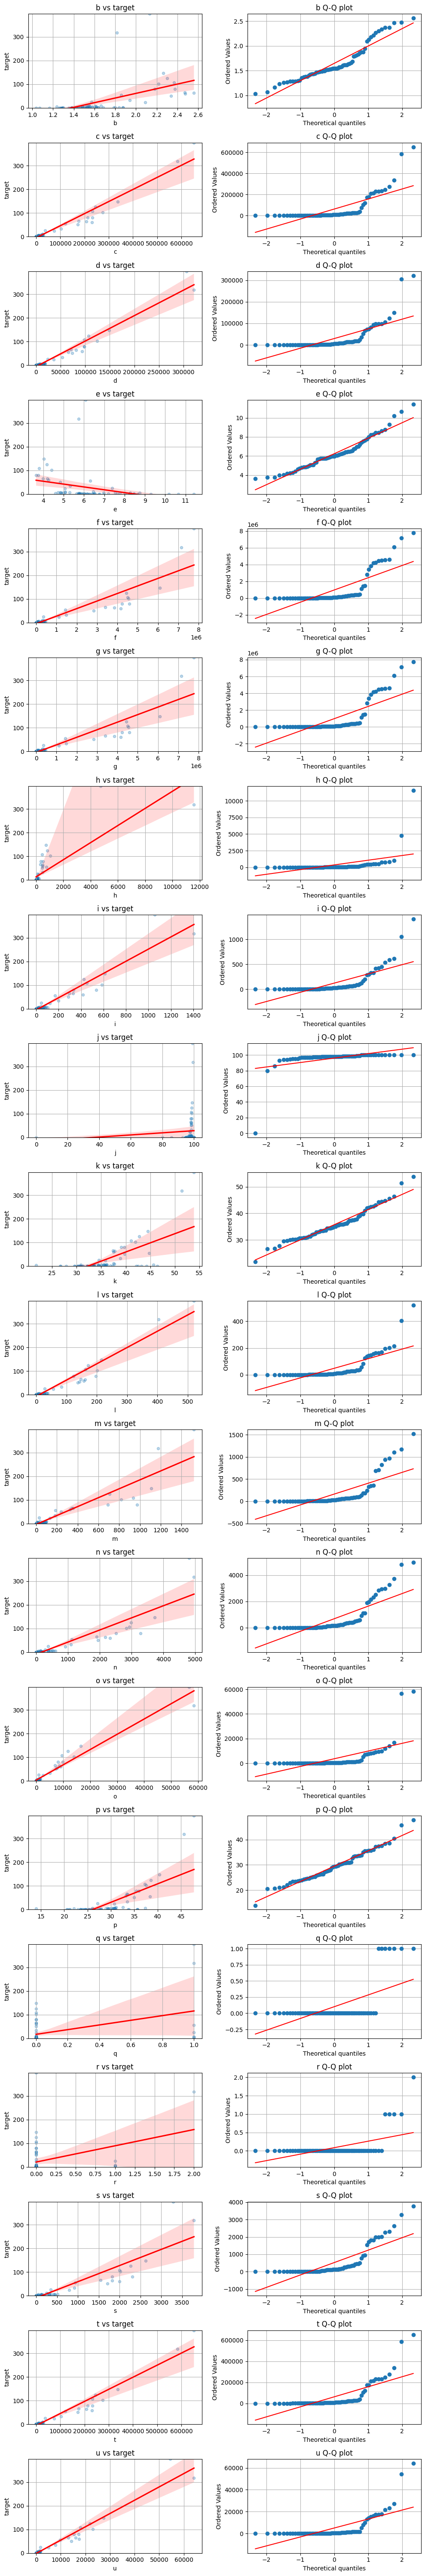

In [22]:
features = train_df.columns.drop(['target', 'id'])

# Determine the grid size
num_features = len(features)
num_cols = 2  # One regplot and one Q-Q plot per feature
num_rows = num_features  # Since each feature gets its own row

# Create a large figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

# Flatten the axes for easier iteration
axes = axes.ravel()

# Define the color for the data points
data_point_color = '#1f77b4'
# Get the max and min SalePrice values to set a common y limit
max_price = train_df['target'].max()
min_price = train_df['target'].min()

for i, feature in enumerate(features):
    # Regression plot
    sns.regplot(data=train_df, x=feature, y='target', ax=axes[2*i], line_kws={'color':'red'}, scatter_kws={'alpha':0.3, 's':20})

    axes[2*i].ticklabel_format(style='plain', axis='y')
    axes[2*i].set_ylim(min_price, max_price)
    axes[2*i].set_title(feature + " vs target")
    axes[2*i].grid(True)

    # Q-Q plot
    probplot(train_df[feature].dropna(), plot=axes[2*i + 1])
    axes[2*i + 1].set_title(feature + " Q-Q plot")
    axes[2*i + 1].grid(True)
 # Apply the same color for Q-Q plot data points
    axes[2*i + 1].get_lines()[0].set_markerfacecolor(data_point_color)
    axes[2*i + 1].get_lines()[0].set_markeredgecolor(data_point_color)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

In [23]:
# 0. Identify outliers using Isolation Forest on the entire dataset
iso_forest = IsolationForest(contamination=0.002, random_state=42)
outliers = iso_forest.fit_predict(train_df)
rows_to_remove = train_df.index[outliers == -1]

# 1. Split the data
X = train_df.drop(['target'], axis=1)
y = train_df['target']

# 2. Create a baseline model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 3. Evaluate the model using cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # increased the number of folds

print(f"Shape of the data before outlier removal: {X.shape}")
# With outliers
scores_with_outliers = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_with_outliers = np.sqrt(-scores_with_outliers.mean())

# Without outliers
X_cleaned = X.drop(rows_to_remove)
y_cleaned = y.drop(rows_to_remove)

print(f"Shape of the data after potential outlier removal: {X_cleaned.shape}")

scores_without_outliers = cross_val_score(model, X_cleaned, y_cleaned, cv=kf, scoring='neg_mean_squared_error')
rmse_without_outliers = np.sqrt(-scores_without_outliers.mean())

# 4. Compare the scores
print(f"RMSE with outliers: {rmse_with_outliers:.2f}")
print(f"RMSE without outliers: {rmse_without_outliers:.2f}")
if rmse_without_outliers < rmse_with_outliers:
    print("Removing outliers improved the model performance.")
    # Update encoded_train_set to be the cleaned version without outliers.
    train_df = train_df.drop(rows_to_remove)
else:
    print("Keeping outliers gave better or similar performance.")


Shape of the data before outlier removal: (69, 21)
Shape of the data after potential outlier removal: (68, 21)
RMSE with outliers: 40.94
RMSE without outliers: 33.64
Removing outliers improved the model performance.


In [24]:
# Calculate skewness
target_skewness = skew(train_df['target'].dropna())  # Using dropna() to exclude missing values if any
print(f"Skewness of Sale Price: {target_skewness}")

# Calculate kurtosis
target_kurtosis = kurtosis(train_df['target'].dropna())  # Using dropna() to exclude missing values if any
print(f"Kurtosis of Sale Price: {target_kurtosis}")

Skewness of Sale Price: 4.682203005082302
Kurtosis of Sale Price: 26.500032770852215


In [25]:
import scipy.stats
skew_df=pd.DataFrame(train_df.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature : scipy.stats.skew(train_df[feature]))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x:True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,id,0.012142,0.012142,False
1,b,0.948907,0.948907,True
2,c,3.048279,3.048279,True
3,d,3.302993,3.302993,True
4,e,0.887721,0.887721,True
5,f,2.154128,2.154128,True
6,g,2.154129,2.154129,True
7,h,6.501242,6.501242,True
8,i,2.728655,2.728655,True
9,j,-7.353941,7.353941,True


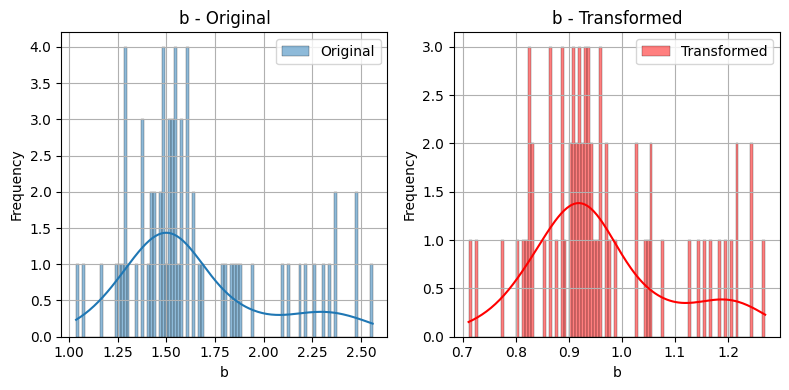

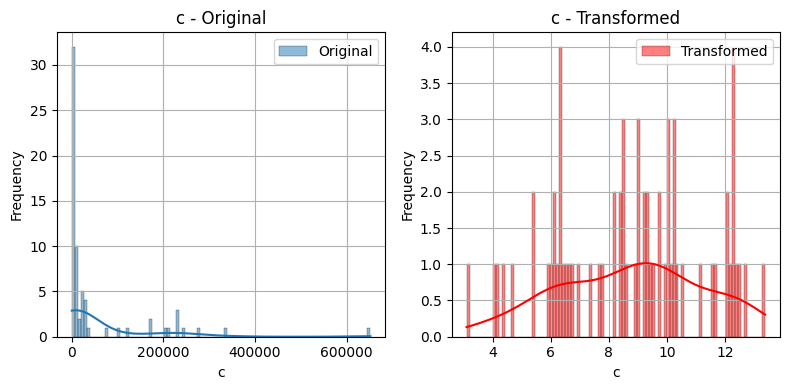

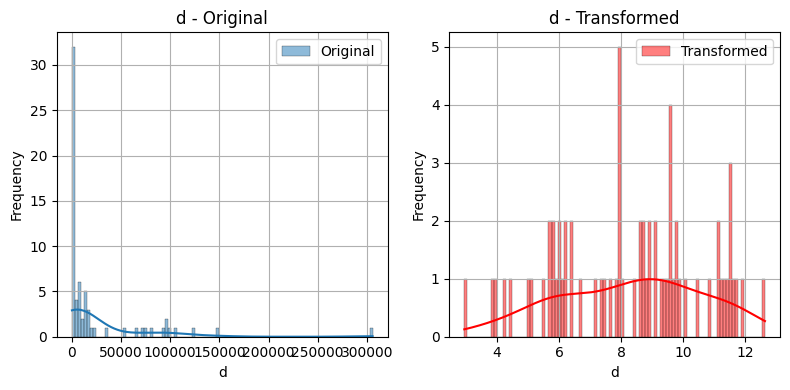

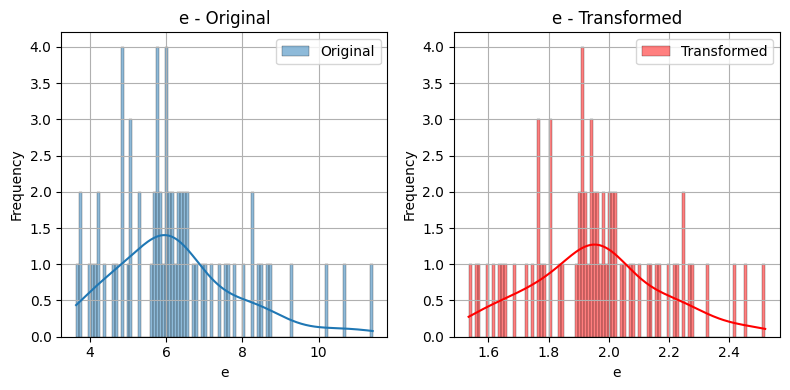

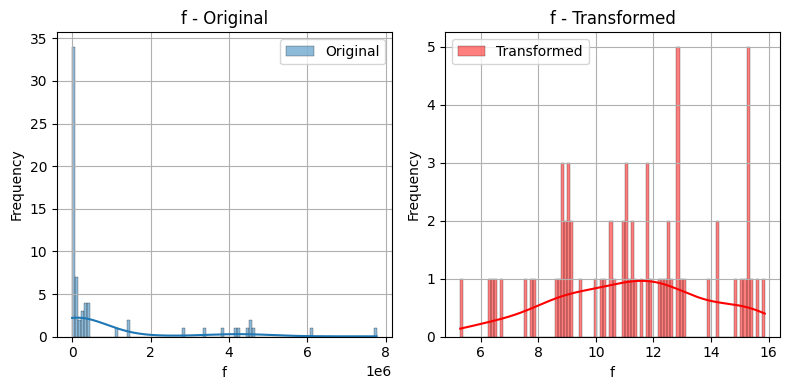

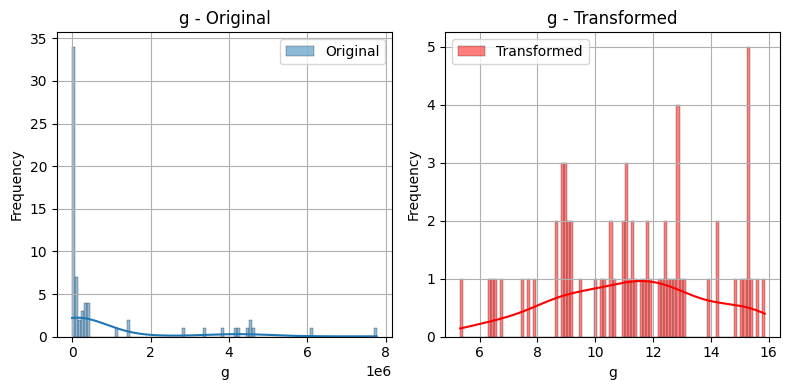

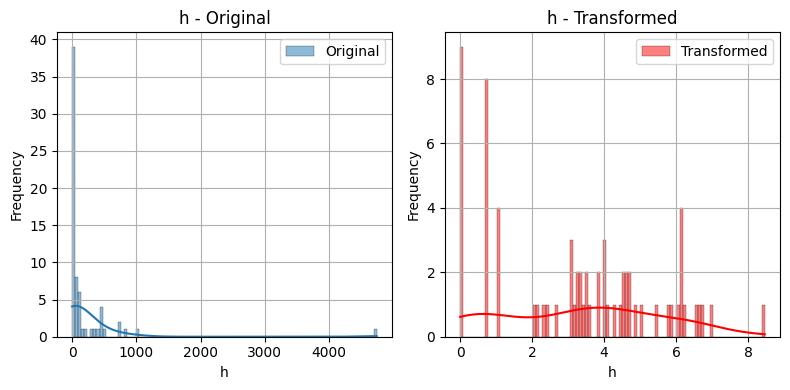

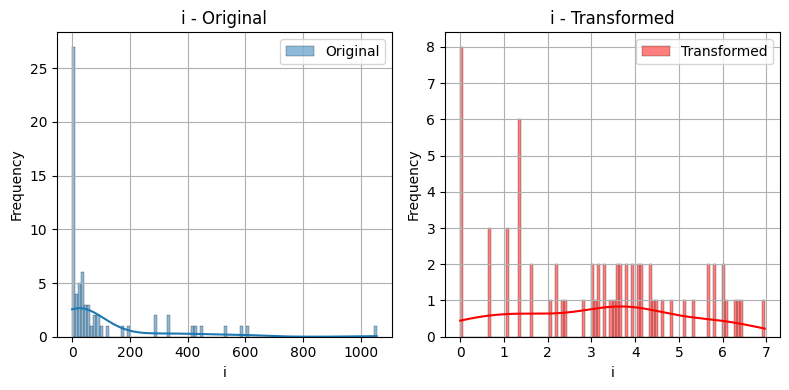

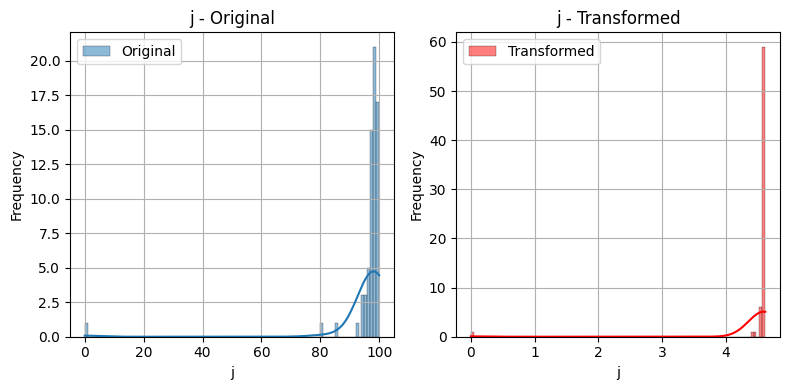

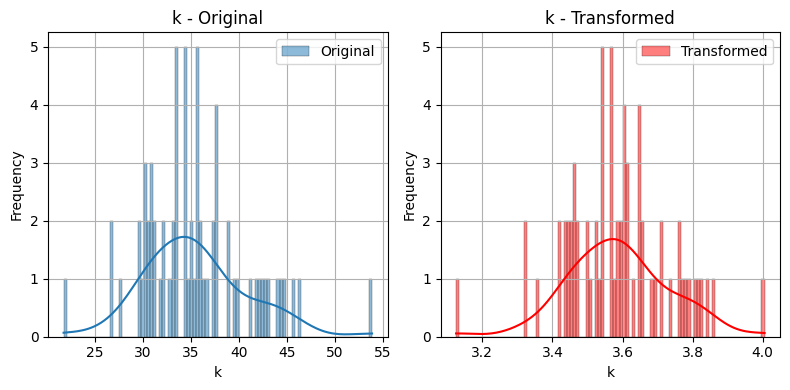

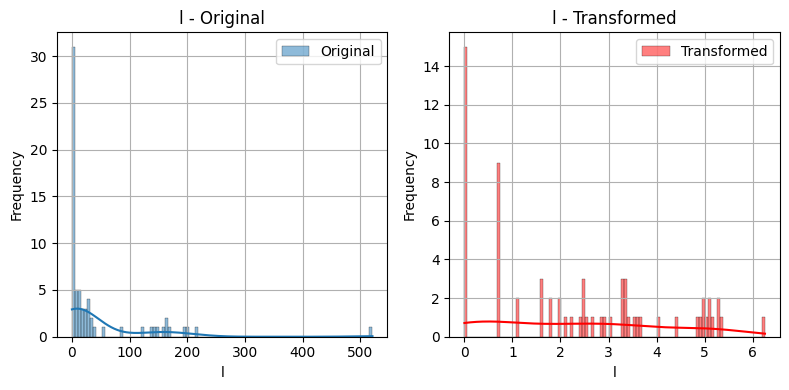

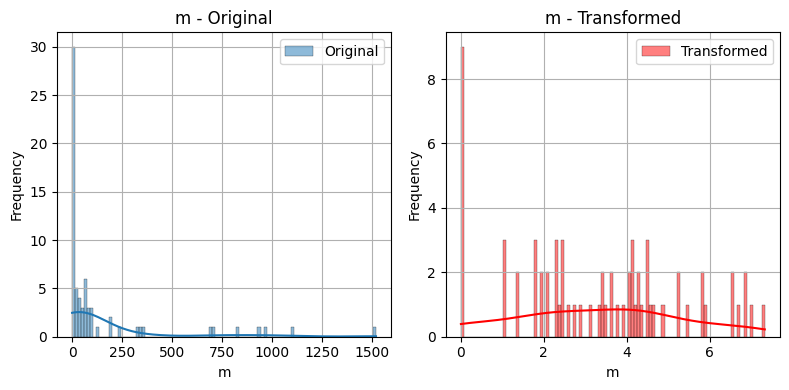

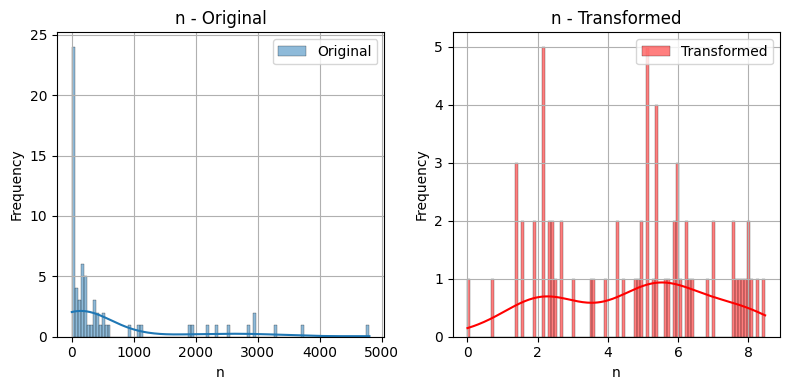

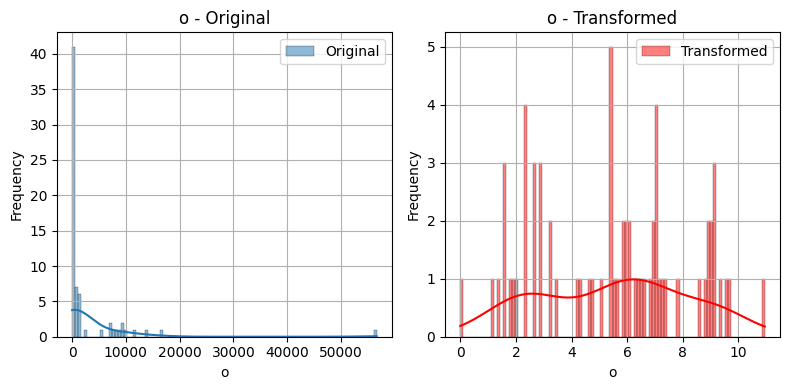

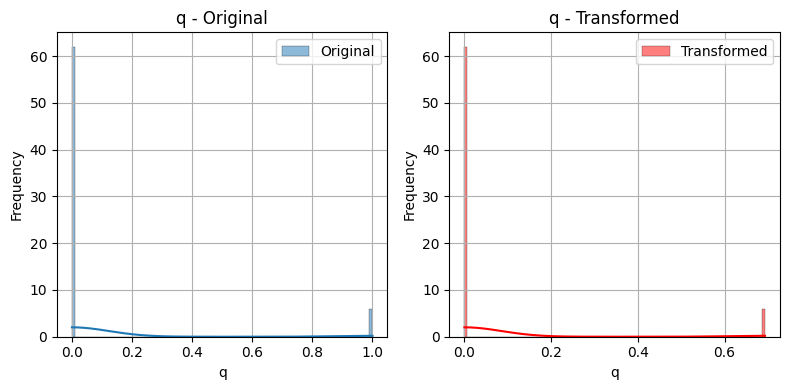

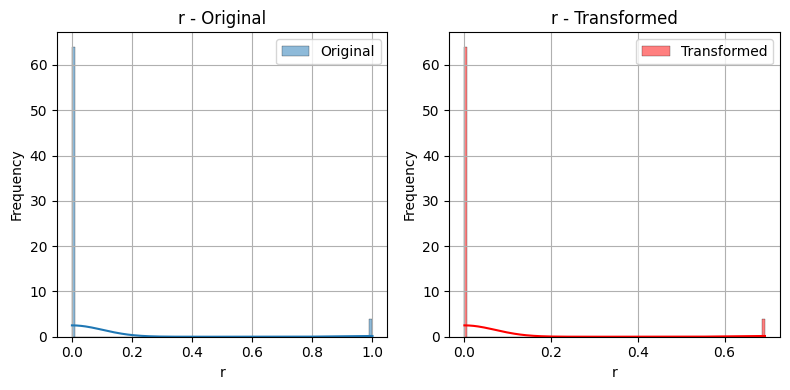

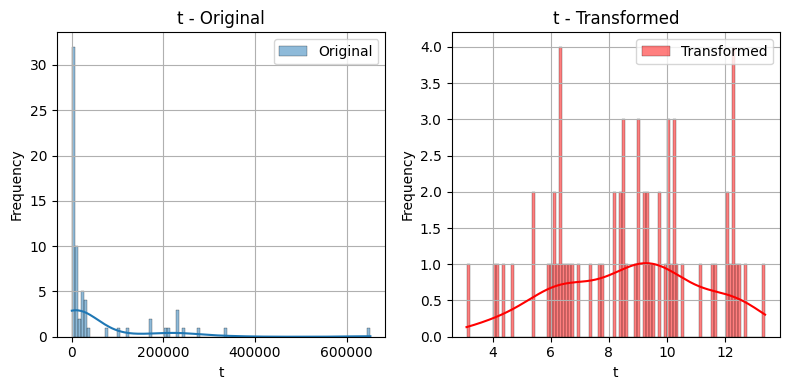

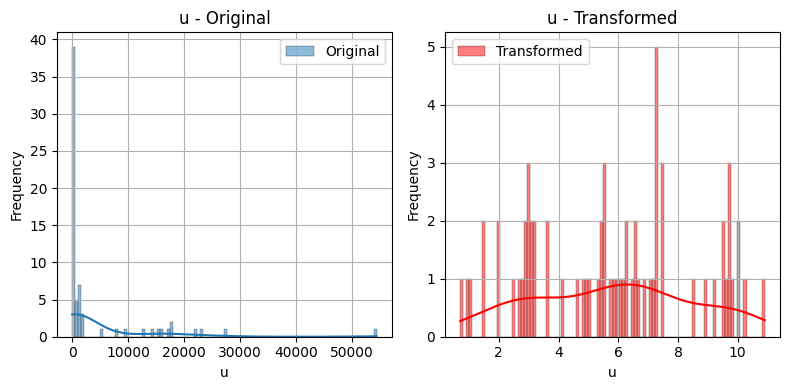

In [26]:
# Prepare the feature matrix X and target vector Y
X = train_df.drop(['target'], axis=1)
y = train_df['target']

# Backup the original data for plotting later
X_original = X.copy()

# Features to apply log scaling
features_to_log_scale = ['b','c','d','e','f','g','h','i','j','k','l','m','n','o','q','r','t','u']

for feature in features_to_log_scale:
    X[feature] = np.log1p(X[feature])

# Standardize the entire feature matrix X
scaler = StandardScaler()  # Initialize the StandardScaler
X_data = scaler.fit_transform(X)

for feature in features_to_log_scale:  # Updated to loop only through specified features
    plt.figure(figsize=(8, 4))

    # Original data
    plt.subplot(1, 2, 1)
    sns.histplot(X_original[feature], bins=100, kde=True, label='Original')
    plt.title(f"{feature} - Original")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()

    # Transformed data
    plt.subplot(1, 2, 2)
    sns.histplot(X[feature], bins=100, color='red', kde=True, label='Transformed')
    plt.title(f"{feature} - Transformed")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


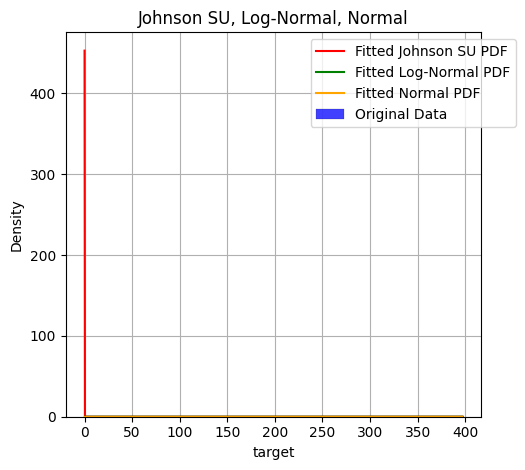


original_Y_data [5.78500e+00 8.26000e-01 1.20100e+00 9.63000e-01 5.96350e+01 3.22000e-01
 3.98500e+00 2.55710e+01 5.08280e+01 1.54300e+00 9.92000e-01 1.07500e+00
 1.77200e+00 1.22600e+00 1.21000e-01 6.42620e+01 6.56370e+01 3.49500e+00
 0.00000e+00 2.47000e+00 1.50000e-01 7.96730e+01 0.00000e+00 9.29600e+00
 7.20000e-02 2.40800e+00 6.66100e+00 0.00000e+00 2.50000e-01 2.47300e+00
 2.14000e-01 4.05500e+00 5.36100e+00 0.00000e+00 1.16100e+00 4.28700e+00
 7.60000e-02 1.01652e+02 1.17100e+00 2.38290e+01 5.38200e+00 3.33450e+01
 1.15600e+00 1.09000e-01 7.97120e+01 1.82000e-01 6.66100e+00 4.60700e+00
 1.33400e+00 0.00000e+00 2.51000e-01 1.07340e+01 5.50310e+01 2.16000e-01
 7.02700e+00 3.67000e-01 3.91000e+00 0.00000e+00 5.99300e+00 1.47525e+02
 0.00000e+00 5.82600e+00 1.31000e-01 0.00000e+00 1.25014e+02 3.97066e+02
 6.01700e+00 1.07846e+02]
transformed_Y_data_Johnsonsu [3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 7.1000e+01 0.0000e+00
 1.0000e+00 2.5000e+01 4.1000e+01 0.0000e+00 0.0000e+00 0.

In [27]:
Y_data = y.to_numpy() # Convert the target vector Y to a NumPy array

Y = Y_data

# ----------------------------------------------------------------------------------------------
# Fit Johnson SU
params_johnsonsu = stats.johnsonsu.fit(Y)
johnson_su_dist = stats.johnsonsu(*params_johnsonsu)


# ----------------------------------------------------------------------------------------------
# Fit Log-Normal
Y_data_log_normal = np.log1p(Y_data) # logarithmic transformation to target variable 'SalePrice'

params_lognorm = stats.lognorm.fit(Y)
lognorm_dist = stats.lognorm(*params_lognorm)

# Fit Normal
params_norm = stats.norm.fit(Y)
norm_dist = stats.norm(*params_norm)

# ----------------------------------------------------------------------------------------------
# Create x values for PDF plotting
x = np.linspace(min(Y), max(Y), 1000)

plt.figure()
plt.title('Johnson SU, Log-Normal, Normal')

# Plot the normalized histogram
sns.histplot(Y, kde=False, label='Original Data', color='blue', bins=300, stat='density')

# Plot the Johnson SU PDF
pdf_johnsonsu = johnson_su_dist.pdf(x)
plt.plot(x, pdf_johnsonsu, label='Fitted Johnson SU PDF', color='red')

# Plot the Log-Normal PDF
pdf_lognorm = lognorm_dist.pdf(x)
plt.plot(x, pdf_lognorm, label='Fitted Log-Normal PDF', color='green')
# Plot the Normal PDF
pdf_norm = norm_dist.pdf(x)
plt.plot(x, pdf_norm, label='Fitted Normal PDF', color='orange')

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Add x-axis description
plt.xlabel('target')

#plt.legend(loc='upper right')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.grid()
plt.show()


# Calculate percentiles for each data point in Y_data
percentiles = [stats.percentileofscore(Y_data, a, 'mean') for a in Y_data]
percentiles = np.array(percentiles) / 100.0  # Convert to 0-1 range

# Calculate the values using the CDFs of Johnson SU and Log-Normal
values_johnsonsu = johnson_su_dist.ppf(percentiles)
# Round the transformed data
rounded_johnsonsu_values = np.round(values_johnsonsu)

print()
print("original_Y_data", Y_data)
print("transformed_Y_data_Johnsonsu", rounded_johnsonsu_values)

# Store the rounded, transformed data back into Y_data
Y_data_JohnsonSU = rounded_johnsonsu_values

In [28]:
start_time = time.time()

models_JohnsonSU = {
    "catboost": CatBoostRegressor(verbose=0),
    "br": BayesianRidge(),
    "xgb": XGBRegressor(),
    "lgbm": LGBMRegressor(),
    "ridge": Ridge(),
    "elastic_net": ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.9]),
    "lasso": LassoCV(alphas=[0.1, 1.0, 10.0]),
    "ridge_cv": RidgeCV(alphas=[0.1, 1.0, 10.0])
}

for name, model_JohnsonSU in models_JohnsonSU.items():
    model_JohnsonSU.fit(X_data, Y_data)
    print(name, "trained")

# Evaluation
results_JohnsonSU = {}

kf = KFold(n_splits=10)
for name, model_JohnsonSU in models_JohnsonSU.items():
    res_JohnsonSU = np.sqrt(-cross_val_score(model_JohnsonSU, X_data, Y_data_JohnsonSU, scoring='neg_mean_squared_error', cv=kf))
    results_JohnsonSU[name] = np.mean(res_JohnsonSU)

for name, res_JohnsonSU in results_JohnsonSU.items():
    print(name, "mean error:", res_JohnsonSU)

catboost trained
br trained
xgb trained
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 19
[LightGBM] [Info] Start training from score 22.646176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [29]:
models_log_normal = {
    "catboost": CatBoostRegressor(verbose=0),
    "xgb": XGBRegressor(),
    "lgbm": LGBMRegressor(),
    "ridge": Ridge(),
    "elastic_net": ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.9]),
    "lasso": LassoCV(alphas=[0.1, 1.0, 10.0]),
    "ridge_cv": RidgeCV(alphas=[0.1, 1.0, 10.0])
}


for name, model_log_normal in models_log_normal.items():
    model_log_normal.fit(X_data, Y_data_log_normal)
    print(name, " trained")

# Evaluation
results_log_normal = {}

kf = KFold(n_splits=10)
for name, model_log_normal in models_log_normal.items():
    res_log_normal = np.sqrt(-cross_val_score(model_log_normal, X_data, Y_data_log_normal, scoring='neg_mean_squared_error', cv=kf))
    results_log_normal[name] = np.mean(res_log_normal)  # Store the mean result in the dictionary
    res_log_normal = np.exp(np.sqrt(-cross_val_score(model_log_normal, X_data, Y_data_log_normal, scoring='neg_mean_squared_error', cv=kf)))

for name, res_log_normal in results_log_normal.items():  # Now this should iterate over the populated dictionary
    print(name, "mean error:", res_log_normal)


# ----------------------------------------------------------------------------------------------
# Timing Model Training
end_time = time.time() # Measure the time it takes to train the model

# Calculate and print the total time
total_time_seconds = end_time - start_time

# Calculate hours, minutes, and seconds
hours = total_time_seconds // 3600
minutes = (total_time_seconds % 3600) // 60
seconds = total_time_seconds % 60

print()
print(f"Total time taken for training: {int(hours)} hours, {int(minutes)} minutes, {round(seconds)} seconds")

catboost  trained
xgb  trained
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 19
[LightGBM] [Info] Start training from score 1.644655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [30]:
X_data_final_test = test_df

# Apply log scaling to the specified features
for feature in features_to_log_scale:
    X_data_final_test[feature] = np.log1p(X_data_final_test[feature])

# Standardize the test feature matrix using the scaler fitted to the training data
# X_data_final_test_scaled = scaler.transform(X_data_final_test)

In [31]:

# preds_JohnsonSU = {}

# #JohnsonSu
# for name, model_JohnsonSU in models_JohnsonSU.items():
#     preds_JohnsonSU.update({name: model_JohnsonSU.predict(X_data_final_test)})


# y_pred_JohnsonSU = (
#                 .4   * preds_JohnsonSU["catboost"] +
#                 .175 * preds_JohnsonSU["lgbm"] +
#                 .075 * preds_JohnsonSU["ridge"] +
#                 .025 * preds_JohnsonSU["xgb"]
# )

In [32]:
preds_log_normal = {}

#for name, model_log_normal in models_log_normal.items():
#     preds_log_normal.update({name: np.exp(model_log_normal.predict(test_df))})

# y_pred_log_normal = (
#                 .55   * preds_log_normal["catboost"] +
#                 .15 * preds_log_normal["lgbm"] +
#                 .15 * preds_log_normal["br"] +
#                 .05 * preds_log_normal["ridge"] +
#                 .1 * preds_log_normal["xgb"]
# )

In [33]:
#generation of data frame for submission
final_df = pd.DataFrame(X_data_final_test['id']) #generates dataframe with the column 'Id'

# This line of code is used as a ensemble methods where predictions from different models are combined with different weights to produce a final prediction, aiming to improve the overall performance of the model.
final_df['target'] = 0.375 * y_pred_JohnsonSU.squeeze() + 0.625 * y_pred_log_normal.squeeze() #adds column 'SalePrice' to final_df dataframe


# Brutal approach to deal with predictions close to outer range. Source: https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook#EDA
q1 = final_df['target'].quantile(0.0045)
q2 = final_df['target'].quantile(0.99)

final_df['target'] = final_df['target'].apply(lambda x: x if x > q1 else x*0.77)
final_df['target'] = final_df['target'].apply(lambda x: x if x < q2 else x*1.1)
final_df.to_csv("predictions.csv",index=False) #writes dataframe into csv. file
print("Prediction submission file successfully generated:")
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='sample_submission.csv')

NameError: name 'y_pred_JohnsonSU' is not defined